In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Importation de bibliotheques:** 

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




# **Chargement de dataset**

In [5]:

df = pd.read_csv("/kaggle/input/prediction-produit/Groceries_dataset.csv")  
df.head()



,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


#  Pretraitement data 

In [6]:
# Transformation "Date" en format datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


# Extraction de data
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday  # 0 = Lundi, 6 = Dimanche

df_grouped = df.groupby(['itemDescription', 'Year', 'Month'])['Member_number'].count().reset_index()
df_grouped.rename(columns={'Member_number': 'Sales'}, inplace=True)

df_grouped['itemDescription'] = df_grouped['itemDescription'].astype('category').cat.codes
df.head()

,Member_number,Date,itemDescription,Year,Month,Day,Weekday
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-01-05,whole milk,2015,1,5,0
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-02-01,whole milk,2015,2,1,6


**chaque itemdescription on lui associe une valeur numerique (indice unique)**

In [7]:
print(df_grouped['itemDescription'].unique())


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166]


# Separation de data d'entrainment 80% et test 20%

In [8]:

X = df_grouped[['itemDescription', 'Year', 'Month']]
y = df_grouped['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Entrainment de modele RandomForest

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
import joblib


joblib.dump(model, 'modele_vente.pkl')
# Sauvegarde de l'encodeur (il associe a chaque produit une val unique carle modele  Machine Learning ne comprent pas directement le texte )
joblib.dump(encoder, 'encoder.pkl')

print(" Modele et encodeur sauvegardés avec succes")

 Modele et encodeur sauvegardés avec succes


# Performance de modele

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_val_score, KFold


# Prediction du modele
y_pred = model.predict(X_test)

# Calcul de metriques 
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE  (Erreur Absolue Moyenne) : {mae:.2f}")
print(f"RMSE (Erreur Quadratique Moyenne) : {rmse:.2f}")
print(f"MAPE (Erreur en %) : {mape:.2%}")
print(f" R² (Coefficient de détermination) : {r2:.2f}")


kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="r2")

print(f"Scores R² par fold : {cross_val_scores}")
print(f"Score R² moyen : {np.mean(cross_val_scores):.2f}")


MAE  (Erreur Absolue Moyenne) : 2.67
RMSE (Erreur Quadratique Moyenne) : 4.22
MAPE (Erreur en %) : 47.36%
 R² (Coefficient de détermination) : 0.93
Scores R² par fold : [0.92544191 0.91690736 0.94049272 0.92545883 0.91958394]
Score R² moyen : 0.93


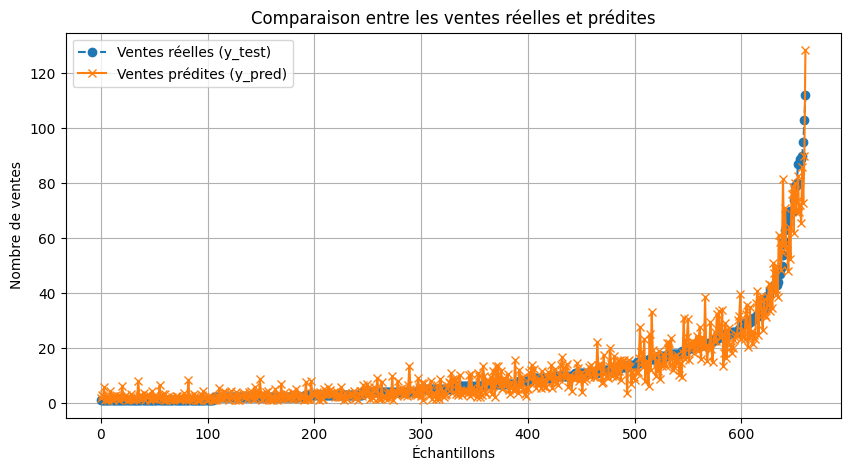

In [20]:


# Trier les valeurs pour une meilleure visualisation
indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[indices]
y_pred_sorted = np.array(y_pred)[indices]


plt.figure(figsize=(10, 5))
plt.plot(y_test_sorted, label="Ventes réelles (y_test)", marker='o', linestyle='dashed')
plt.plot(y_pred_sorted, label="Ventes prédites (y_pred)", marker='x', linestyle='solid')


plt.xlabel("Échantillons")
plt.ylabel("Nombre de ventes")
plt.title("Comparaison entre les ventes réelles et prédites")
plt.legend()
plt.grid()

# Affichage
plt.show()


# Real Time 

In [18]:


def predire_vente():
    global encoder  
    while True:
        produit_test = input(" Entrez un produit alimentaire (ou 'exit' pour quitter) : ").strip()
        if produit_test.lower() == 'exit':
            print("Fin de la prediction.")
            break

       
        if produit_test not in encoder.classes_:
            print("Produit non trouve. Essayez un autre.")
            continue

        produit_code = encoder.transform([produit_test])[0]

        
        try:
            annee = int(input("Entrez l'annee : "))
            mois = int(input(" Entrez le mois (1-12) : "))
            if mois < 1 or mois > 12:
                print("Mois invalide !")
                continue
        except ValueError:
            print(" Entree invalide !")
            continue

       
        produit_code = encoder.transform([produit_test])[0]  # Convertir en valeur numérique
        nouvelle_data = pd.DataFrame({'itemDescription': [produit_code], 'Year': [annee], 'Month': [mois]})


        # Pedection
        prediction = model.predict(nouvelle_data)
        print(f" Prédiction des ventes pour '{produit_test}' en {mois}/{annee} : {round(prediction[0])} unités")       

from sklearn.preprocessing import LabelEncoder

if 'encoder' not in globals():
    encoder = LabelEncoder()
    df['itemCode'] = encoder.fit_transform(df['itemDescription'])
# Lancer la prediction en real time
predire_vente()

 Entrez un produit alimentaire (ou 'exit' pour quitter) :  oil
Entrez l'annee :  2012
 Entrez le mois (1-12) :  4


 Prédiction des ventes pour 'oil' en 4/2012 : 10 unités


 Entrez un produit alimentaire (ou 'exit' pour quitter) :  exit


Fin de la prediction.
